In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Data Loading
df=pd.read_csv('../data/test(in).csv')
df.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [43]:
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Overview:
Shape: (2191, 10)
Columns: ['Subject', 'body', 'date', 'from', 'year', 'month', 'year_month', 'sentiment', 'sentiment_score', 'message_length']

Data Types:
Subject                    object
body                       object
date               datetime64[ns]
from                       object
year                        int32
month                       int32
year_month              period[M]
sentiment                  object
sentiment_score             int64
message_length              int64
dtype: object

Missing Values:
Subject            0
body               0
date               0
from               0
year               0
month              0
year_month         0
sentiment          0
sentiment_score    0
message_length     0
dtype: int64


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Subject          2191 non-null   object        
 1   body             2191 non-null   object        
 2   date             2191 non-null   datetime64[ns]
 3   from             2191 non-null   object        
 4   year             2191 non-null   int32         
 5   month            2191 non-null   int32         
 6   year_month       2191 non-null   period[M]     
 7   sentiment        2191 non-null   object        
 8   sentiment_score  2191 non-null   int64         
 9   message_length   2191 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(2), object(4), period[M](1)
memory usage: 154.2+ KB


In [23]:
from datetime import datetime
# Data Cleaning and Preparation
print("Starting Data Preprocessing...")

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for any invalid dates
print(f"Invalid dates: {df['date'].isnull().sum()}")

# Fill missing dates with the most frequent date or drop if necessary
if df['date'].isnull().sum() > 0:
    df = df.dropna(subset=['date'])

# Extract year and month for time-based analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.to_period('M')

print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Unique employees (from column): {df['from'].nunique()}")

Starting Data Preprocessing...
Invalid dates: 0
Date range: 2010-01-01 00:00:00 to 2011-12-31 00:00:00
Unique employees (from column): 10


In [24]:
df.head()

,Subject,body,date,from,year,month,year_month
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,2010,5,2010-05
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,2010,7,2010-07
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,2011,7,2011-07
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,2010,3,2010-03
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,2011,5,2011-05


In [25]:
# Sentiment Analysis Function

import re
from textblob import TextBlob
def analyze_sentiment(text):
    """
    Analyze sentiment of text using TextBlob
    into 'Positive', 'Negative', or 'Neutral'
    """
    if pd.isna(text) or text == '':
        return 'Neutral'
    
    # Removing special characters and extra spaces
    text = str(text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    if len(text) < 3:  # Too short for meaningful analysis
        return 'Neutral'
    
    # Get sentiment polarity
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    # Classify based on polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

print("Performing Sentiment Analysis...")
# Apply sentiment analysis to each message
df['sentiment'] = df['body'].apply(analyze_sentiment)

# Add numerical scores for calculations
df['sentiment_score'] = df['sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

print("Sentiment Distribution:")
print(df['sentiment'].value_counts())

Performing Sentiment Analysis...
Sentiment Distribution:
sentiment
Neutral     1068
Positive     954
Negative     169
Name: count, dtype: int64


In [26]:
df.head(3)

,Subject,body,date,from,year,month,year_month,sentiment,sentiment_score
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,2010,5,2010-05,Positive,1
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,2010,7,2010-07,Neutral,0
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,2011,7,2011-07,Neutral,0


## EDA(Exploratory Data Analysis)

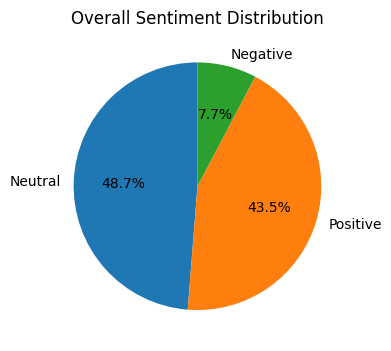

✓ Saved: sentiment_distribution.jpg


In [ ]:
# 1. Sentiment Distribution Pie Chart
plt.figure(figsize=(4, 4))
sentiment_counts = df['sentiment'].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Sentiment Distribution')
plt.tight_layout()
plt.savefig('../visualization/sentiment_distribution.jpg', dpi=100, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

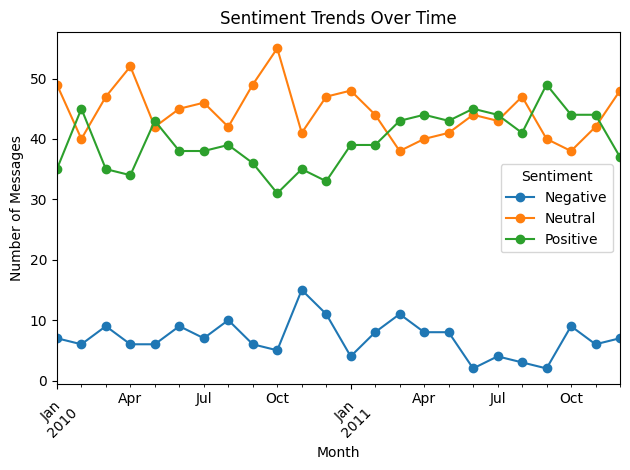

✓ Saved: sentiment_trends.jpg


In [ ]:
# 2. Sentiment Trends Over Time Line Chart
plt.figure(figsize=(10, 6))
monthly_sentiment = df.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)
monthly_sentiment.plot(kind='line', marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visualization/sentiment_trends.jpg', dpi=300, bbox_inches='tight')
plt.show()

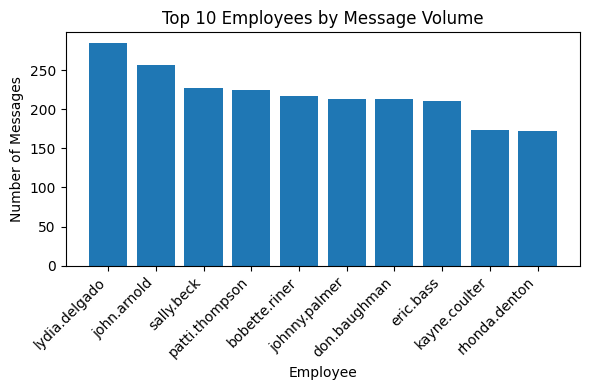

In [41]:
plt.figure(figsize=(6, 4))
top_employees = df['from'].value_counts().head(10)
plt.bar(range(len(top_employees)), top_employees.values)
plt.title('Top 10 Employees by Message Volume')
plt.xlabel('Employee')
plt.ylabel('Number of Messages')
plt.xticks(range(len(top_employees)), 
           [email.split('@')[0] for email in top_employees.index], 
           rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../visualization/top_employees_volume.jpg', dpi=300, bbox_inches='tight')
plt.show()


Calculating Employee Monthly Scores...
Monthly Score Summary:
Total employee-month combinations: 240
Average monthly score: 3.27
Highest monthly score: 12
Lowest monthly score: -1


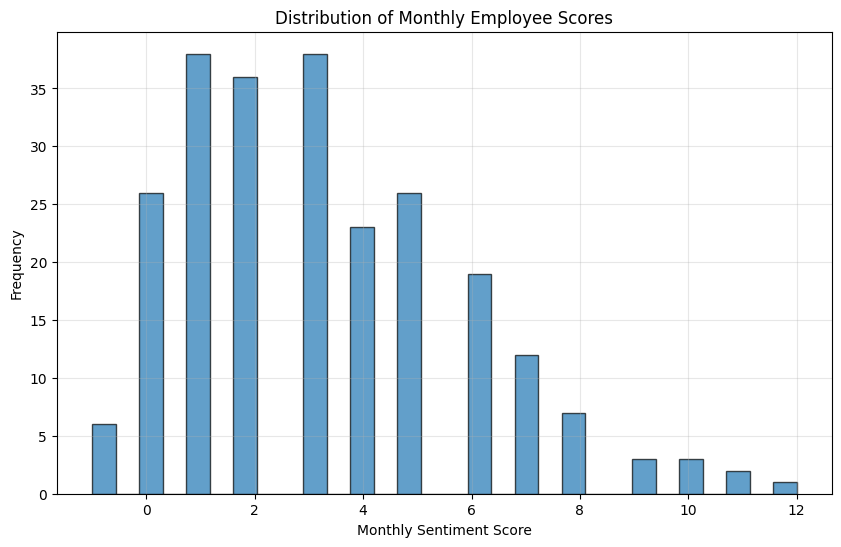

In [45]:
print("Calculating Employee Monthly Scores...")

# Calculate monthly scores for each employee
employee_monthly_scores = df.groupby(['from', 'year_month']).agg({
    'sentiment_score': 'sum',
    'body': 'count',  # message count
    'sentiment': lambda x: (x == 'Negative').sum()  # count negative messages
}).reset_index()

employee_monthly_scores.columns = ['employee', 'year_month', 'monthly_score', 'message_count', 'negative_count']

# Display summary
print("Monthly Score Summary:")
print(f"Total employee-month combinations: {len(employee_monthly_scores)}")
print(f"Average monthly score: {employee_monthly_scores['monthly_score'].mean():.2f}")
print(f"Highest monthly score: {employee_monthly_scores['monthly_score'].max()}")
print(f"Lowest monthly score: {employee_monthly_scores['monthly_score'].min()}")

# Plot monthly score distribution
plt.figure(figsize=(10, 6))
plt.hist(employee_monthly_scores['monthly_score'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Monthly Employee Scores')
plt.xlabel('Monthly Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.savefig('../visualization/score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Employee Score Calculation

Calculating Employee Monthly Scores...
Monthly Score Summary:
Total employee-month combinations: 240
Average monthly score: 3.27
Highest monthly score: 12
Lowest monthly score: -1


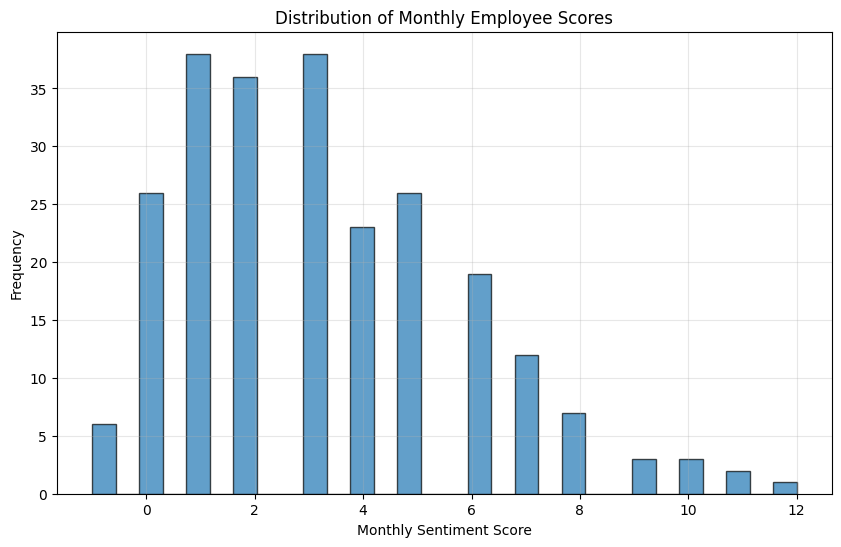

In [47]:
print("Calculating Employee Monthly Scores...")

# Calculate monthly scores for each employee
employee_monthly_scores = df.groupby(['from', 'year_month']).agg({
    'sentiment_score': 'sum',
    'body': 'count',  # message count
    'sentiment': lambda x: (x == 'Negative').sum()  # count negative messages
}).reset_index()

employee_monthly_scores.columns = ['employee', 'year_month', 'monthly_score', 'message_count', 'negative_count']

# Display summary
print("Monthly Score Summary:")
print(f"Total employee-month combinations: {len(employee_monthly_scores)}")
print(f"Average monthly score: {employee_monthly_scores['monthly_score'].mean():.2f}")
print(f"Highest monthly score: {employee_monthly_scores['monthly_score'].max()}")
print(f"Lowest monthly score: {employee_monthly_scores['monthly_score'].min()}")

# Plot monthly score distribution
plt.figure(figsize=(10, 6))
plt.hist(employee_monthly_scores['monthly_score'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Monthly Employee Scores')
plt.xlabel('Monthly Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.savefig('../visualization/score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Generating Employee Rankings...


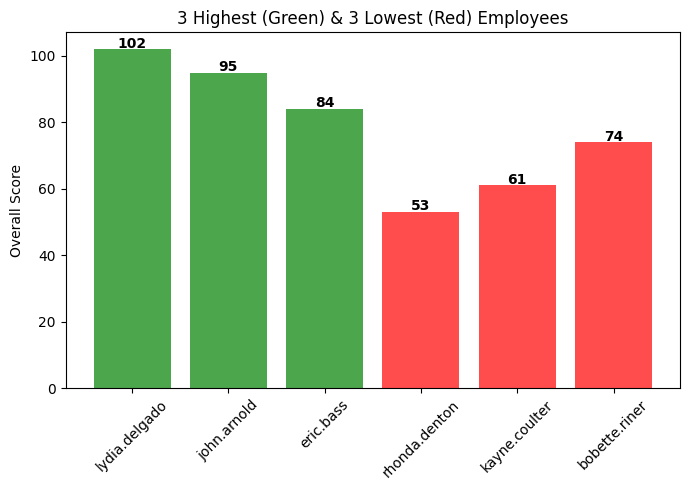

✅ Rankings saved!


In [55]:
print("Generating Employee Rankings...")

# Calculate overall scores
overall_scores = employee_monthly_scores.groupby('employee')['monthly_score'].sum()

# Get top and bottom 3
top_3 = overall_scores.nlargest(3)
bottom_3 = overall_scores.nsmallest(3)

# Combine for the chart
all_scores = pd.concat([top_3, bottom_3])

# Create the chart
plt.figure(figsize=(7, 5))

# Make only the lowest 3 red, highest 3 green
colors = ['green', 'green', 'green', 'red', 'red', 'red']

plt.bar(range(len(all_scores)), all_scores.values, color=colors, alpha=0.7)
plt.title('3 Highest (Green) & 3 Lowest (Red) Employees')
plt.ylabel('Overall Score')
plt.xticks(range(len(all_scores)), [e.split('@')[0] for e in all_scores.index], rotation=45)

# Add value labels
for i, score in enumerate(all_scores.values):
    plt.text(i, score + (0.5 if score > 0 else -1), f'{score}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../visualization/employee_score_rankings.jpg', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Rankings saved!")

In [57]:
print("Identifying Flight Risks...")

# Monthly-based flight risk 
monthly_flight_risks = employee_monthly_scores[employee_monthly_scores['negative_count'] >= 4]
print(f"\nEmployees with 4+ negative messages in a month: {len(monthly_flight_risks)}")
if not monthly_flight_risks.empty:
    print("Monthly Flight Risks:")
    for _, row in monthly_flight_risks.iterrows():
        print(f"- {row['employee']} in {row['year_month']}: {row['negative_count']} negative messages")

Identifying Flight Risks...

Employees with 4+ negative messages in a month: 2
Monthly Flight Risks:
- bobette.riner@ipgdirect.com in 2010-11: 5 negative messages
- lydia.delgado@enron.com in 2011-12: 4 negative messages


# Building Predictive model 

In [59]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK data
try:
    nltk.download('punkt', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('omw-1.4', quiet=True)
except:
    print("NLTK data download skipped - using fallback methods")

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [60]:
# Text preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    text = str(text)
    
    # Remove special characters and numbers, keep only letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and short words, then lemmatize
    processed_tokens = [
        lemmatizer.lemmatize(token) 
        for token in tokens 
        if token not in stop_words and len(token) > 2
    ]
    
    return ' '.join(processed_tokens)


In [61]:
# Apply text preprocessing
df['cleaned_body'] = df['body'].apply(preprocess_text)


In [ ]:
# Prepare features for modeling
model_data = employee_monthly_scores.copy()

# Combine all cleaned text for each employee
employee_texts = df.groupby('from')['cleaned_body'].apply(lambda x: ' '.join(x)).reset_index()
employee_texts.columns = ['employee', 'combined_text']

# Merge with model data
model_data = model_data.merge(employee_texts, on='employee', how='left')

# Fill NaN values in combined_text
model_data['combined_text'] = model_data['combined_text'].fillna('')

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=100, stop_words='english')  # Limit to top 100 features
tfidf_features = tfidf.fit_transform(model_data['combined_text'])

# Convert TF-IDF features to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), 
                       columns=[f'tfidf_{i}' for i in range(tfidf_features.shape[1])])

# Combine TF-IDF features with other features
model_data_combined = pd.concat([model_data.reset_index(drop=True), tfidf_df], axis=1)

In [69]:
# Select features for modeling
basic_features = ['message_count', 'negative_count']
all_features = basic_features + list(tfidf_df.columns)

X = model_data_combined[all_features]
y = model_data_combined['monthly_score']

print(f"Feature matrix shape: {X.shape}")
print(f"Number of features: {len(all_features)}")
print(f"TF-IDF features: {tfidf_features.shape[1]}")

Feature matrix shape: (240, 102)
Number of features: 102
TF-IDF features: 100


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

if len(X) > 5:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared Score: {r2:.4f}")


Training set: 192 samples
Testing set: 48 samples
Mean Squared Error: 2.0527
R-squared Score: 0.6815
